In [7]:
library(dplyr)
library(ggplot2)
library(readr)
library(magrittr)
# install.packages("Rmisc")
library(Rmisc)

library(dplyr)
library(ggplot2)
library(readr)
library(magrittr)
require(tidyr)
require(dplyr)
require(lazyeval)

ERROR: Error in library(Rmisc): there is no package called ‘Rmisc’


In [17]:
upper.metrics <- read_delim('upper10th_irc1080_betweenness_centrality_all.csv', delim = ',', col_names = FALSE);
lower.metrics <- read_delim('lower10th_irc1080_betweenness_centrality_all.csv', delim = ',', col_names = FALSE);
# dim(d_upper); dim(d_lower);


colnames(upper.metrics) <- c('upper_lambda', 'upper_selected_divergence', 'upper_alpha','upper_omega_A');
colnames(lower.metrics) <- c('lower_lambda', 'lower_selected_divergence', 'lower_alpha', 'lower_omega_A');
head(d_upper); head(d_lower)


Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double()
)


ERROR: Error in head(d_upper): object 'd_upper' not found


ERROR: Error in head(d_lower): object 'd_lower' not found


In [18]:
my.summary<-data.frame(value=c(mean(upper.metrics$upper_omega_A), mean(upper.metrics$upper_lambda),
                               mean(upper.metrics$upper_alpha), mean(upper.metrics$upper_selected_divergence),
                                mean(lower.metrics$lower_omega_A), mean(lower.metrics$lower_lambda),
                               mean(lower.metrics$lower_alpha), mean(lower.metrics$lower_selected_divergence)),
                         sd=c(sd(upper.metrics$upper_omega_A), sd(upper.metrics$upper_lambda),
                               sd(upper.metrics$upper_alpha), sd(upper.metrics$upper_selected_divergence), sd(lower.metrics$lower_omega_A), sd(lower.metrics$lower_lambda),
                               sd(lower.metrics$lower_alpha), sd(lower.metrics$lower_selected_divergence)),
                         metric=rep(c("omega_A", "lambda", "alpha", "selected_divergence"), 
                                  times=2),
                         max_connectivity=rep(c("top 10%", "bottom 10%"), each=4))


In [19]:
my.summary

value,sd,metric,max_connectivity
<dbl>,<dbl>,<fct>,<fct>
0.05775358,0.006171828,omega_A,top 10%
0.22911450,0.006551682,lambda,top 10%
0.26713714,0.027781423,alpha,top 10%
0.04958733,0.003328057,selected_divergence,top 10%
0.08687767,0.015652162,omega_A,bottom 10%
0.16554369,0.006835941,lambda,bottom 10%
0.54647604,0.061077777,alpha,bottom 10%
0.02611079,0.001981448,selected_divergence,bottom 10%


In [25]:
my.summary.cis <- my.summary %>%
    mutate(error = qt(0.975, df = (n() - 1)) * ((sd) / sqrt(n()))) %>%
    mutate(error_left = value - error, error_right = value + error) 

my.summary.cis

value,sd,metric,max_connectivity,error,error_left,error_right
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
0.05775358,0.006171828,omega_A,top 10%,0.005159778,0.05259380,0.06291336
0.22911450,0.006551682,lambda,top 10%,0.005477343,0.22363716,0.23459184
0.26713714,0.027781423,alpha,top 10%,0.023225851,0.24391129,0.29036299
0.04958733,0.003328057,selected_divergence,top 10%,0.002782325,0.04680500,0.05236966
0.08687767,0.015652162,omega_A,bottom 10%,0.013085535,0.07379213,0.09996321
0.16554369,0.006835941,lambda,bottom 10%,0.005714990,0.15982870,0.17125868
0.54647604,0.061077777,alpha,bottom 10%,0.051062299,0.49541374,0.59753834
0.02611079,0.001981448,selected_divergence,bottom 10%,0.001656532,0.02445426,0.02776732


In [23]:
# my.summary$lowerCI<-my.summary$value - qt(0.975,df=length(upper.metrics$iteration)-1)*my.summary$sd/sqrt(length(upper.metrics$iteration))
# my.summary$upperCI<-my.summary$value + qt(0.975,df=length(upper.metrics$iteration)-1)*my.summary$sd/sqrt(length(upper.metrics$iteration))

# qt(0.975,df=length(w1$vals)-1)*sd(w1$vals)/sqrt(length(w1$vals))


# my.summary$lowerCI <- c(0.26347915999854193, 0.3988594779534713, 0.564460943689365, 0.18610107917377028, 0.20683602394707545, 0.40079603730768965, 0.4769812398839154, 0.17314648621907025)
# my.summary$upperCI <- c(0.27987517663512135, 0.4149986210564297, 0.5862523434393477, 0.19945155448959606, 0.21799795625094442, 0.4140932894249839, 0.4979478294230152, 0.18305626625617727 )

In [15]:
my.summary

value,sd,metric,max_connectivity,lowerCI,upperCI
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
0.08314287,0.009356180,omega_A,top 10%,NaN,NaN
0.16066489,0.007021540,lambda,top 10%,NaN,NaN
0.60856269,0.045289107,alpha,top 10%,NaN,NaN
0.02190855,0.001588151,selected_divergence,top 10%,NaN,NaN
0.14663283,0.009477945,omega_A,bottom 10%,NaN,NaN
0.17694565,0.006349746,lambda,bottom 10%,NaN,NaN
0.65859319,0.030601513,alpha,bottom 10%,NaN,NaN
0.03938661,0.002145064,selected_divergence,bottom 10%,NaN,NaN


In [16]:
my.summary<-my.summary[order(my.summary$metric, my.summary$max_connectivity),]

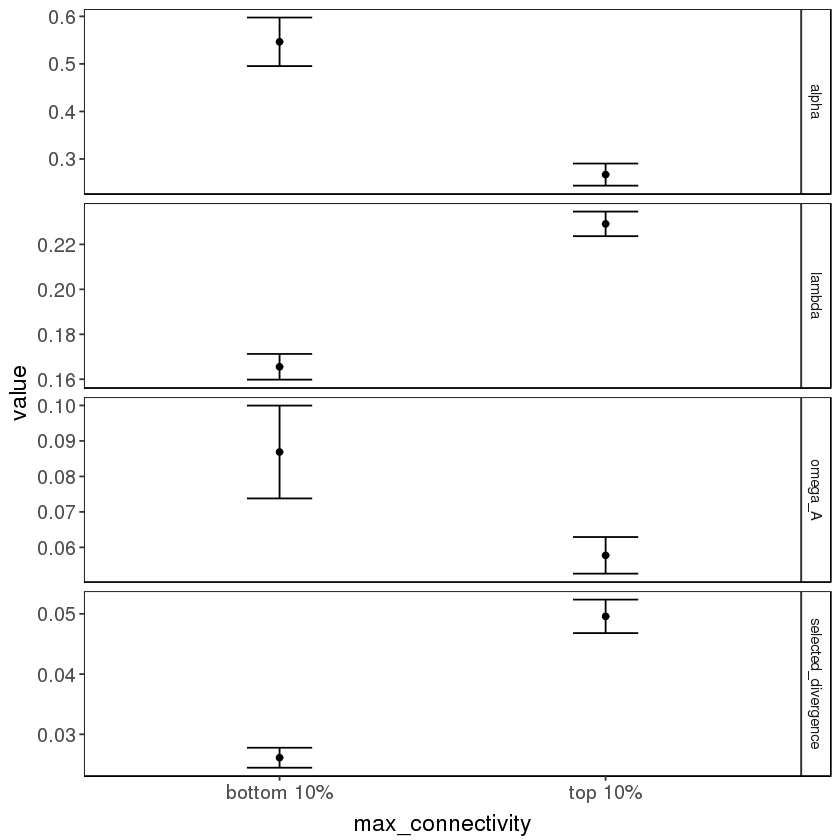

In [26]:
my_font = 'Helvetica'
my.plot<-ggplot(data=my.summary.cis, aes(max_connectivity, value)) +
geom_point()  +
facet_grid(metric~., scales = "free_y") +
geom_errorbar(data=my.summary,
              aes(ymin=my.summary.cis$error_left, 
                  ymax=my.summary.cis$error_right, width=0.2)) +
theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.border = element_rect(colour="black"), 
        strip.background = element_rect(colour="black", fill="white"),
        axis.text.x=element_text(size=12, family=my_font), axis.title.x=element_text(size=14, family=my_font,vjust=0.01),
        axis.text.y=element_text(size=12, family=my_font), axis.title.y=element_text(size=14, family=my_font))
my.plot

# ggsave(plot=my.plot, "all_measures_between_centrality.png")